**WPROWADZENIE**

Wytłumaczenie kodu:
Dropdown: Pozwala użytkownikowi wybierać lokalizacje.
Mapa: Używam biblioteki dash_leaflet do stworzenia interaktywnej mapy.
Callback: Funkcja w Dash, która aktualizuje pozycję markera i centrum mapy na podstawie wybranej lokalizacji.
Po uruchomieniu tego kodu, Dash utworzy lokalny serwer, na którym będzie dostępna aplikacja z mapą i listą rozwijaną. Użytkownik będzie mógł wybrać lokalizację z listy, a mapa automatycznie skupi się na wybranej lokalizacji.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Załadowanie danych
data_path = '../2. Data/processed/future_data.csv'
future_data = pd.read_csv(data_path)


In [12]:
future_data.head()

,Unnamed: 0,temp,estimated_irradiance,humidity_modifier,pressure,feels_like,year,month,day,lat,lon,city_name,clouds_all,weather_main,predicted_energy_production_kWh
0,0,1.299102,3.982532,0.957145,1016.544416,-2.999682,2024,1,1,48.76564,8.228524,Baden_Baden,91.521967,5,13.746724
1,1,-1.130263,2.090739,0.957145,1016.544416,-4.506064,2024,1,2,48.76564,8.228524,Baden_Baden,93.942728,2,7.567000
2,2,-1.070462,2.987580,0.957145,1016.544416,-5.139450,2024,1,3,48.76564,8.228524,Baden_Baden,95.267179,1,10.533200
3,3,-1.268416,0.005961,0.957145,1016.544416,-3.024337,2024,1,4,48.76564,8.228524,Baden_Baden,93.678527,6,4.237000
4,4,-0.373296,2.609318,0.957145,1016.544416,-3.355876,2024,1,5,48.76564,8.228524,Baden_Baden,93.031673,4,9.500000


    year    city_name  average_predicted_energy
0   2024  Baden_Baden               3579.115056
1   2024     Bozanska               3579.830977
2   2024  Walcz_Drugi               3533.881891
3   2025  Baden_Baden               3654.214857
4   2025     Bozanska               3543.409760
5   2025  Walcz_Drugi               3473.402748
6   2026  Baden_Baden               3513.526602
7   2026     Bozanska               3526.777194
8   2026  Walcz_Drugi               3425.438233
9   2027  Baden_Baden               3559.586029
10  2027     Bozanska               3557.236850
11  2027  Walcz_Drugi               3514.308831
12  2028  Baden_Baden               3507.868400
13  2028     Bozanska               3579.213925
14  2028  Walcz_Drugi               3590.699686
15  2029  Baden_Baden               3468.533463
16  2029     Bozanska               3561.463102
17  2029  Walcz_Drugi               3641.702777
18  2030  Baden_Baden               3551.796646
19  2030     Bozanska               3533

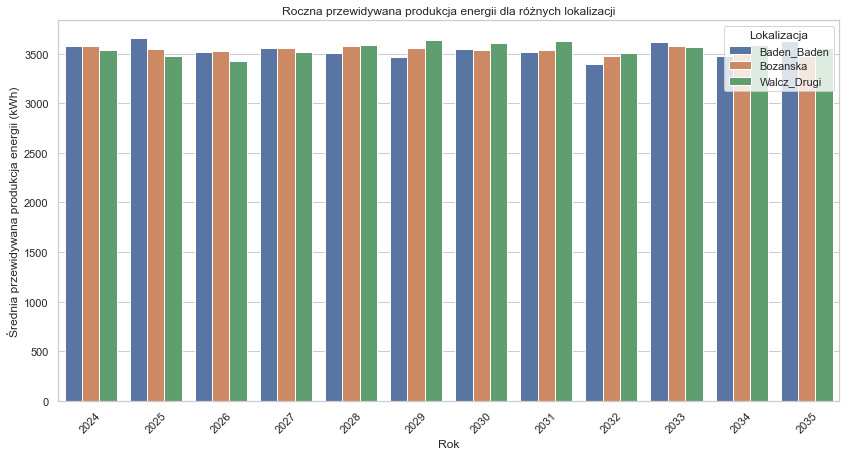

In [13]:

# Agregacja danych do średniej rocznej produkcji energii dla każdej lokalizacji
annual_predictions = future_data.groupby(['year', 'city_name']).agg(
    average_predicted_energy=('predicted_energy_production_kWh', 'sum')
).reset_index()

# Wyświetlenie przewidywanych średnich rocznych wartości produkcji energii
print(annual_predictions)


# Ustawienie stylu wykresu
sns.set(style="whitegrid")

# Tworzenie wykresu
plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='average_predicted_energy', hue='city_name', data=annual_predictions)
plt.title('Roczna przewidywana produkcja energii dla różnych lokalizacji')
plt.xlabel('Rok')
plt.ylabel('Średnia przewidywana produkcja energii (kWh)')
plt.legend(title='Lokalizacja')
plt.xticks(rotation=45)  # Obrót etykiet dla lepszej czytelności
plt.show()

     year  month    city_name  average_predicted_energy
0    2024      1  Baden_Baden                277.545419
1    2024      1     Bozanska                254.979424
2    2024      1  Walcz_Drugi                255.716096
3    2024      2  Baden_Baden                281.417803
4    2024      2     Bozanska                256.916272
..    ...    ...          ...                       ...
427  2035     11     Bozanska                253.090161
428  2035     11  Walcz_Drugi                239.850821
429  2035     12  Baden_Baden                249.363532
430  2035     12     Bozanska                247.232629
431  2035     12  Walcz_Drugi                263.493926

[432 rows x 4 columns]


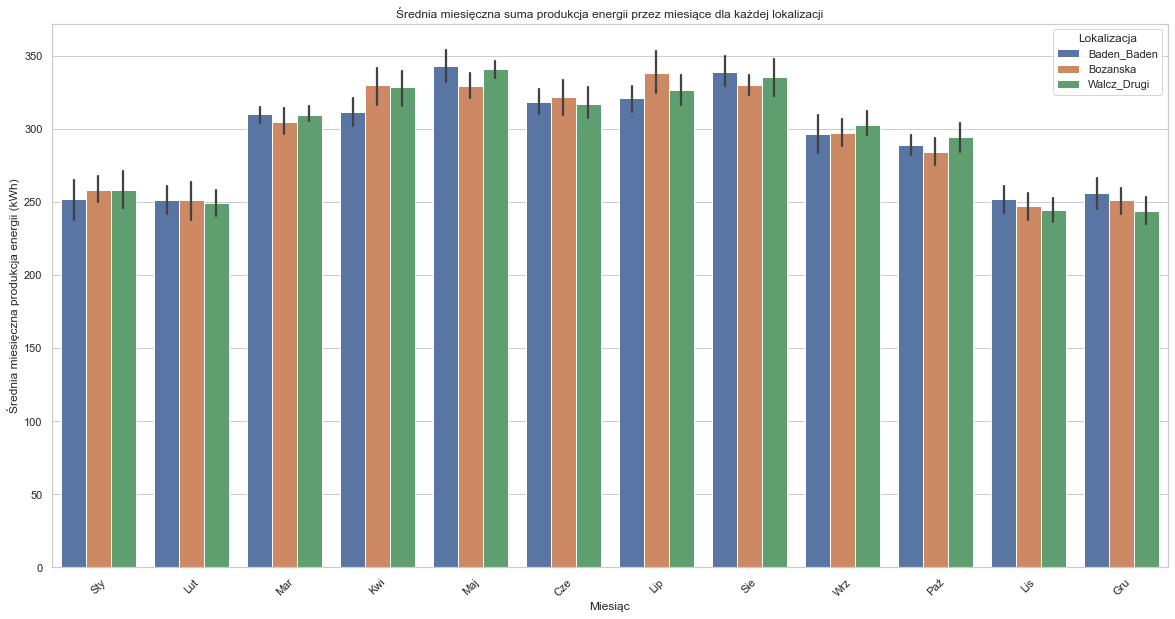

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregacja danych do średniej miesięcznej produkcji energii dla każdej lokalizacji
monthly_predictions = future_data.groupby(['year', 'month', 'city_name']).agg(
    average_predicted_energy=('predicted_energy_production_kWh', 'sum')
).reset_index()

# Wyświetlenie przewidywanych średnich miesięcznych wartości produkcji energii
print(monthly_predictions)

# Ustawienie stylu wykresu
sns.set(style="whitegrid")

# Tworzenie wykresu miesięcznego
plt.figure(figsize=(20, 10))
sns.barplot(x='month', y='average_predicted_energy', hue='city_name', data=monthly_predictions)
plt.title('Średnia miesięczna suma produkcja energii przez miesiące dla każdej lokalizacji')
plt.xlabel('Miesiąc')
plt.ylabel('Średnia miesięczna produkcja energii (kWh)')
plt.legend(title='Lokalizacja')
plt.xticks(ticks=range(12), labels=['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru'], rotation=45)
plt.show()


### FINALNA WIZUALIZACJA

In [15]:
import dash
from dash import dcc, html, Input, Output, State
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objects import Bar, Figure

# Załadowanie danych
df = pd.read_csv("../2. Data/processed/final_df_processed.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Załadowanie danych przyszłościowych
future_data = pd.read_csv("../2. Data/processed/future_data.csv")
future_data['year'] = pd.to_datetime(future_data['year'], format='%Y').dt.year

# Dane dla stolic Europy
capitals_data = {
    'city_name': ['Berlin', 'Paris', 'Madrid', 'Rome', 'Warsaw', 'London', 'Athens', 'Vienna', 'Budapest', 'Prague', 'Moscow', 'Kiev', 'Oslo', 'Stockholm', 'Helsinki', 'Copenhagen', 'Amsterdam', 'Brussels', 'Lisbon', 'Dublin'],
    'lat': [52.52, 48.8566, 40.4165, 41.9028, 52.2297, 51.5074, 37.9838, 48.2082, 47.4979, 50.0755, 55.7558, 50.4501, 59.9139, 59.3293, 60.1695, 55.6761, 52.3676, 50.8503, 38.7223, 53.3498],
    'lon': [13.405, 2.3522, -3.7038, 12.4964, 21.0122, -0.1278, 23.7275, 16.3738, 19.0402, 14.4378, 37.6173, 30.5234, 10.7522, 18.0686, 24.9384, 12.5683, 4.9041, 4.3517, -9.1393, -6.2603]
}
capitals_df = pd.DataFrame(capitals_data)

# Inicjalizacja aplikacji Dash
app = dash.Dash(__name__)

# Layout aplikacji
app.layout = html.Div([
    dcc.Input(id='city-input', type='text', placeholder='Wpisz nazwę miejscowości'),
    html.Button('Sprawdź', id='submit-button', n_clicks=0),
    html.Div("---------------------------------------------"),
    html.Div("Otwórz w przeglądarce: http://127.0.0.1:8050/"),
    html.Div("---------------------------------------------"),
    html.Div("Dostępne miejscowości: Baden_Baden, Bozanska, Walcz_Drugi"),
    html.Div(id='error-message'),
    html.Div([
        dcc.Graph(id='monthly-weather-chart', style={'width': '48%','height': '100vh', 'display': 'inline-block', 'margin-right': '2%'}),
        dcc.Graph(id='map-chart', style={'width': '48%','height': '100vh', 'display': 'inline-block', 'margin-left': '2%'})
    ]),
    
    html.Div([
        dcc.Graph(id='monthly-energy-chart', style={'width': '100%'})
    ]),
    html.Div([
        dcc.Graph(id='annual-energy-chart', style={'width': '100%', 'height': '400px'}),
        dcc.RangeSlider(
            id='year-range-slider',
            min=df['year'].min(),
            max=df['year'].max(),
            value=[df['year'].min(), df['year'].max()],
            marks={str(year): str(year) for year in df['year'].unique()},
            step=None,
            tooltip={"placement": "bottom", "always_visible": True}  # Konfiguracja Tooltip
        )
    ], style={'width': '100%'}),
    html.Div([
    dcc.Graph(id='future-energy-prediction-chart', style={'width': '100%', 'height': '400px'})
]),
    
    # Div z informacjami o "Szacowanym zapotrzebowaniu"
html.Div([
        html.H3("Szacowane zapotrzebowanie:"),
            html.Ol([
            html.Li([
                html.H4("Wyznaczenie podstawowych wartości zużycia energii dla pomp ciepła:"),
                html.P("Pompy ciepła są zazwyczaj bardziej efektywne niż tradycyjne systemy ogrzewania, więc ich zużycie energii jest niższe. Przyjmując, że pompa ciepła ma średnią efektywność i biorąc pod uwagę różne rozmiary domów, można założyć następujące wartości:"),
                html.Ul([
                    html.Li("70 m²: Około 50 kWh/m² rocznie"),
                    html.Li("100 m²: Około 50 kWh/m² rocznie"),
                    html.Li("150 m²: Około 50 kWh/m² rocznie")
                ])
            ]),
            html.Li([
                html.H4("Kalkulacja rocznego zapotrzebowania na energię:"),
                html.P("Dla rodziny z dwojgiem dzieci:"),
                html.Ul([
                    html.Li("70 m²: 70m² × 50 kWh/m² = 3500 kWh"),
                    html.Li("100 m²: 100m² × 50 kWh/m² = 5000 kWh"),
                    html.Li("150 m²: 150m² × 50 kWh/m² = 7500 kWh")
                ]),
                html.P("Dla pary (założenie: mniejsze zapotrzebowanie na ciepłą wodę i ogólnie energię):"),
                html.Ul([
                    html.Li("70 m²: 70m² × 50 kWh/m² × 0.85 = 2975 kWh (15% mniej)"),
                    html.Li("100 m²: 100m² × 50 kWh/m² × 0.85 = 4250 kWh"),
                    html.Li("150 m²: 150m² × 50 kWh/m² × 0.85 = 6375 kWh")
                ])
            ]),
            html.Li([
                html.H4("Uwagi:"),
                html.Ul([
                    html.Li("Przyjęto, że zapotrzebowanie na energię jest niższe o 15% dla pary w porównaniu z rodziną z dwojgiem dzieci ze względu na mniejsze zużycie ciepłej wody i mniejszą liczbę urządzeń elektrycznych w użytku."),
                    html.Li("Rzeczywiste zużycie energii może się różnić w zależności od jakości izolacji domu, lokalizacji geograficznej (klimatu), stylu życia mieszkańców oraz wieku i stanu technicznego pompy ciepła.")
                ])
            ])
        ])
    ])
])

# Callback dla dynamicznej aktualizacji i mapy
@app.callback(
    [Output('error-message', 'children'),
     Output('city-input', 'style'),
     Output('annual-energy-chart', 'figure'),
     Output('monthly-weather-chart', 'figure'),
     Output('map-chart', 'figure'),
     Output('monthly-energy-chart', 'figure'),
     Output('future-energy-prediction-chart', 'figure')],
    [Input('submit-button', 'n_clicks'),
     Input('year-range-slider', 'value')],
    [State('city-input', 'value')]
)
def update_output(n_clicks, year_range, city):
    # Inicjacja pustych wykresów dla przypadku błędu
    empty_fig = {'data': [], 'layout': {'title': {'text': 'Brak danych do wyświetlenia'}}}

    if city not in df['city_name'].unique():
        # Zwraca pustą mapę, wykresy i komunikat o błędzie
        return ('Nie ma takiej miejscowości w bazie', {'border': '2px solid red'}, empty_fig, empty_fig, empty_fig, empty_fig, empty_fig)

    filtered_df = df[(df['city_name'] == city) & (df['year'] >= year_range[0]) & (df['year'] <= year_range[1])]
    annual_energy_fig = px.bar(filtered_df, x='year', y='daily_energy_production_kWh', title=f'Roczna produkcja energii przez lata dla {city}')

    # Dodanie przewidywań przyszłej produkcji energii dla tej lokalizacji
    predicted_data = future_data[future_data['city_name'] == city]
    future_energy_fig = px.bar(predicted_data, x='year', y='predicted_energy_production_kWh', title=f'Przewidywana produkcja energii przez lata dla {city}')

    weather_attributes = ['temp','clouds_all', 'humidity', 'wind_speed']
    attribute_labels = ['Temperatura (°C)','Zachmurzenie (%)', 'Wilgotność (%)', 'Prędkość wiatru (m/s)']
    monthly_weather_fig = make_subplots(rows=4, cols=1, subplot_titles=attribute_labels, vertical_spacing=0.2)
    for i, attr in enumerate(weather_attributes, start=1):
        monthly_data = filtered_df.groupby('month')[attr].mean().reset_index()
        monthly_weather_fig.add_trace(go.Scatter(x=monthly_data['month'], y=monthly_data[attr], mode='lines+markers'), row=i, col=1)
        monthly_weather_fig.update_xaxes(title_text="Miesiące", tickvals=list(range(1, 13)), row=i, col=1)

    monthly_weather_fig.update_layout(height=800, showlegend=False, title_text="Średnie miesięczne warunki pogodowe na przestrzeni wszystkich lat", title_x=0.5)
    monthly_weather_fig.update_yaxes(rangemode='tozero')

    # Obliczanie średniej miesięcznej dla wybranego miasta bez ograniczenia lat
    city_data = df[df['city_name'] == city]
    grouped_data = city_data.groupby(['year', 'month'])['daily_energy_production_kWh'].sum().reset_index()
    average_monthly_energy = grouped_data.groupby('month')['daily_energy_production_kWh'].mean().reset_index()

    # Tworzenie wykresu Plotly
    monthly_energy_fig = Figure(data=[
        Bar(x=average_monthly_energy['month'], y=average_monthly_energy['daily_energy_production_kWh'])
    ])
    monthly_energy_fig.update_layout(
        title=f'Średnia miesięczna produkcja energii przez miesiące dla {city} na przestrzeni lat',
        xaxis=dict(title='Miesiąc', tickmode='array', tickvals=list(range(1, 13)), ticktext=['Sty', 'Lut', 'Mar', 'Kwi', 'Maj', 'Cze', 'Lip', 'Sie', 'Wrz', 'Paź', 'Lis', 'Gru']),
        yaxis=dict(title='Średnia miesięczna produkcja energii (kWh)'),
        barmode='group'
    )

    # Znajdź dane dla wybranej lokalizacji
    location_data = df[df['city_name'] == city].drop_duplicates(subset=['city_name'])

    # Tworzenie wykresu dla wybranej lokalizacji
    map_fig = px.scatter_geo(location_data, lat='lat', lon='lon', hover_name='city_name',
                             projection='natural earth', title='Lokalizacja na mapie Europy',
                             size_max=20, color_discrete_sequence=["red"])

    # Dodanie punktów dla Stolic z odpowiednią etykietą
    map_fig.add_scattergeo(lat=capitals_df['lat'], lon=capitals_df['lon'], hoverinfo='text',
                           text=capitals_df['city_name'], marker=dict(size=5, color='blue', symbol='circle'), name='Stolice')

    # Dodanie śladu dla wybranej lokalizacji z odpowiednią etykietą
    map_fig.add_scattergeo(lat=location_data['lat'], lon=location_data['lon'], hoverinfo='text',
                           text=city, marker=dict(size=10, color='red', symbol='circle'),
                           name=city)

    # Aktualizacja ustawień mapy
    map_fig.update_geos(
        visible=True, showcountries=True, countrycolor="Black",
        showcoastlines=True, coastlinecolor="Black",
        showland=True, landcolor="LightGreen",
        projection_scale=2
    )
    map_fig.update_layout(
        geo=dict(
            scope='europe', projection_type='orthographic', showframe=False,
            showcoastlines=True, landcolor='rgb(243, 243, 243)',
            countrycolor='rgb(204, 204, 204)',
            lataxis_range=[35, 70],
            lonaxis_range=[-25, 40],
            projection_scale=2
        ),
        legend_title_text='Legenda'
    )

    return ('', {'border': '1px solid green'}, annual_energy_fig, monthly_weather_fig, map_fig, monthly_energy_fig, future_energy_fig)


if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Użycie innego portu, np. 8051
